In [3]:
import os
import cv2
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from joblib import dump
import matplotlib.pyplot as plt

In [4]:
train_data_path = "C:/Users/galse/DS50_SAMBA/images/train"
valid_data_path = "C:/Users/galse/DS50_SAMBA/images/valid"
test_data_path = "C:/Users/galse/DS50_SAMBA/images/test"
train_classes = os.listdir(train_data_path)
valid_classes = os.listdir(valid_data_path)
test_classes = os.listdir(test_data_path)

IMAGE_HEIGHT = 435
IMAGE_WIDTH = 303

In [5]:
train_images = []
train_labels = []
valid_images = []
valid_labels = []
test_images = []
test_labels = []

# chargement des images et labels d'entrainement
for i, class_name in enumerate(train_classes):
    class_path = os.path.join(train_data_path, class_name)
    for image_name in os.listdir(class_path):
        image_path = os.path.join(class_path, image_name)
        image = cv2.imread(image_path)
        # Redimensionner l'image à une taille fixe (taille moyenne des images)
        resized_image = cv2.resize(image, (IMAGE_HEIGHT, IMAGE_WIDTH))
        # Aplatissement de l'image en une seule dimension
        flattened_image = resized_image.reshape(-1)
        train_images.append(flattened_image)
        train_labels.append(i)

# chargement des images et labels de test
for i, class_name in enumerate(valid_classes):
    class_path = os.path.join(valid_data_path, class_name)
    for image_name in os.listdir(class_path):
        image_path = os.path.join(class_path, image_name)
        image = cv2.imread(image_path)
        # Redimensionner l'image à une taille fixe (taille moyenne des images)
        resized_image = cv2.resize(image, (IMAGE_HEIGHT, IMAGE_WIDTH))
        # Aplatissement de l'image en une seule dimension
        flattened_image = resized_image.reshape(-1)
        valid_images.append(flattened_image)
        valid_labels.append(i)

# chargement des images et labels de test
for i, class_name in enumerate(test_classes):
    class_path = os.path.join(test_data_path, class_name)
    for image_name in os.listdir(class_path):
        image_path = os.path.join(class_path, image_name)
        image = cv2.imread(image_path)
        # Redimensionner l'image à une taille fixe (taille moyenne des images)
        resized_image = cv2.resize(image, (IMAGE_HEIGHT, IMAGE_WIDTH))
        # Aplatissement de l'image en une seule dimension
        flattened_image = resized_image.reshape(-1)
        test_images.append(flattened_image)
        test_labels.append(i)

# Conversion des listes en tableaux NumPy
train_images = np.array(train_images)
train_labels = np.array(train_labels)
valid_images = np.array(valid_images)
valid_labels = np.array(valid_labels)
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [6]:
# Affectation des données d'entrainement et de test
X_train = train_images
y_train = train_labels
X_valid = valid_images
y_valid = valid_labels
X_test = test_images
y_test = test_labels

In [7]:
# Utiliser le meilleur k pour créer un modèle KNN final
model = RandomForestClassifier(n_estimators=300)

# Entraîner le modèle final sur les données d'entraînement
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300)

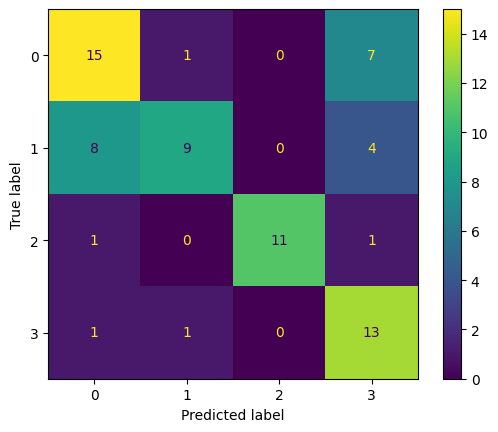

Accuracy on valid dataset :  0.6666666666666666


In [8]:
y_pred = model.predict(X_valid)
cm = confusion_matrix(y_valid,y_pred)
disp_cm = ConfusionMatrixDisplay(confusion_matrix=cm)
disp_cm.plot()
plt.show()

correct_predictions = cm.diagonal().sum()
total_samples = cm.sum()
accuracy = correct_predictions / total_samples
print(f"Accuracy on valid dataset : ", accuracy)

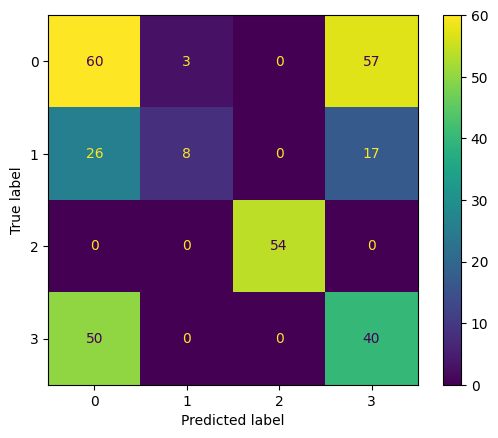

Accuracy on test dataset :  0.5142857142857142


In [9]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
disp_cm = ConfusionMatrixDisplay(confusion_matrix=cm)
disp_cm.plot()
plt.show()

correct_predictions = cm.diagonal().sum()
total_samples = cm.sum()
accuracy = correct_predictions / total_samples
print(f"Accuracy on test dataset : ", accuracy)

In [11]:
# Sauvegarder le modèle final entraîné
dump(model, 'C:/Users/galse/DS50_SAMBA/models/randomForest.joblib')

['C:/Users/galse/DS50_SAMBA/models/randomForest.joblib']